# Task - 1(a):
**Scatter Plot of the given PCA data.**

In [1]:
# Importing required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

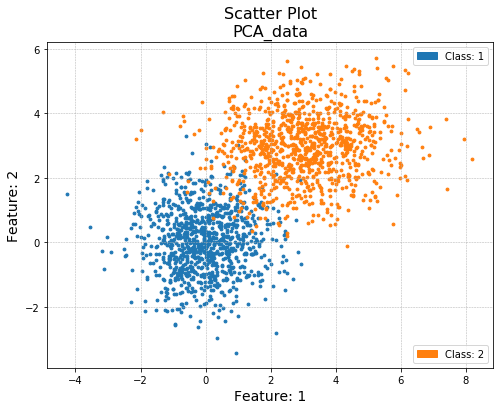

In [25]:
df = pd.read_excel("pca_data.xlsx")
#df.plot()  # plots all columns against index
fig = plt.figure(figsize=(8,6))

for k,g in df.groupby('class'):
    plt.scatter(g['feature 1'],g['feature 2'], 8)
    
Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot\nPCA_data", size = 16)
plt.xlabel("Feature: 1", size = 14)
plt.ylabel("Feature: 2", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()
# scatter plot

# Task - 1(b):
**Scatter Plot of the given LDA data.**

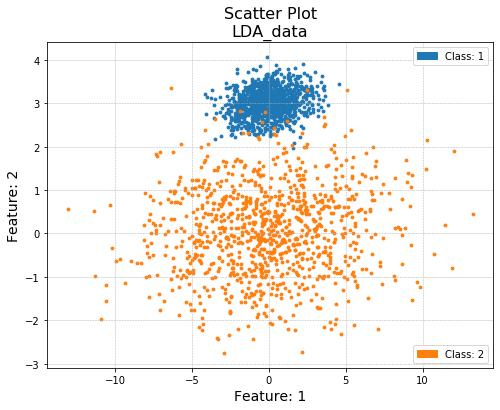

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
df = pd.read_excel("lda_data.xlsx")
#df.plot()  # plots all columns against index
fig = plt.figure(figsize=(8,6))

for k,g in df.groupby('class'):
    plt.scatter(g['feature 1'],g['feature 2'], 8)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot\nLDA_data", size = 16)
plt.xlabel("Feature: 1", size = 14)
plt.ylabel("Feature: 2", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()
# scatter plot

# Task - 3 (LDA)
**Performing LDA on lda_data file:**

2


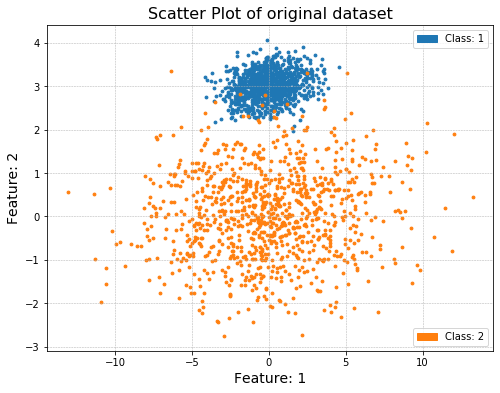

In [35]:
df = pd.read_excel('lda_data.xlsx')
X = df.iloc[:, :2]  # Extracting Features
y = df.iloc[:, 2]   # class

n_features = X.shape[1]
class_labels=np.unique(y)
#print(class_label)

fig = plt.figure(figsize=(8,6))

for k,g in df.groupby('class'):
    plt.scatter(g['feature 1'],g['feature 2'], 8)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot of original dataset", size = 16)
plt.xlabel("Feature: 1", size = 14)
plt.ylabel("Feature: 2", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()


In [14]:
#S_W,S_B
mean_overall = np.mean(X, axis = 0)
#print(mean_overall)
S_W = np.zeros((n_features, n_features))
S_B = np.zeros((n_features, n_features))

for c in class_labels:
    X_c = X[y ==c]
    mean = np.mean(X_c, axis = 0)
    
    S_W += (X_c - mean).T.dot(X_c - mean) 
    
    n_c = X_c.shape[0]
    mean_diff = (mean - mean_overall).values.reshape(n_features,1)
    
    S_B += n_c * (mean_diff).dot(mean_diff.T)

In [50]:
#Generating the eigen vector along with the seperability is maximum

A = np.linalg.inv(S_W).dot(S_B)
eig_val, eig_vec = np.linalg.eig(A)
print("Eigen values are:\n", eig_val)

eig_vec = eig_vec.T
idxs = np.argsort(eig_val)[::-1]    #sort the eigenvector
eig_val = eig_val[idxs]
eig_vec = eig_vec[idxs]

print("\nEigen vector is: \n", eig_vec[0].T)
projected = np.dot(X,eig_vec[0].T)

lineardf= pd.DataFrame(projected, columns=['ld_axis'])
lineardf['class'] = y
print("\n", lineardf)

Eigen values are:
 [0.         3.81524988]

Eigen vector is: 
 [ 0.02443741 -0.99970136]

        ld_axis  class
0    -2.797704      1
1    -3.090059      1
2    -3.426683      1
3    -2.943976      1
4    -3.113639      1
...        ...    ...
1995 -1.906615      2
1996 -0.864723      2
1997 -0.427728      2
1998  0.050091      2
1999 -0.645317      2

[2000 rows x 2 columns]


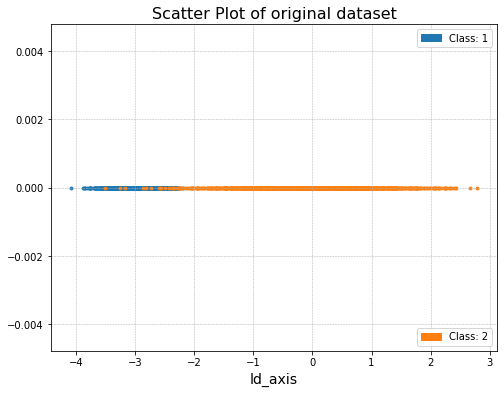

In [28]:
plt.figure(figsize=(8, 6))

for k,g in lineardf.groupby('class'):
    plt.scatter(g['ld_axis'], [0] * len(g), 8)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot of original dataset", size = 16)
plt.xlabel("ld_axis", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()

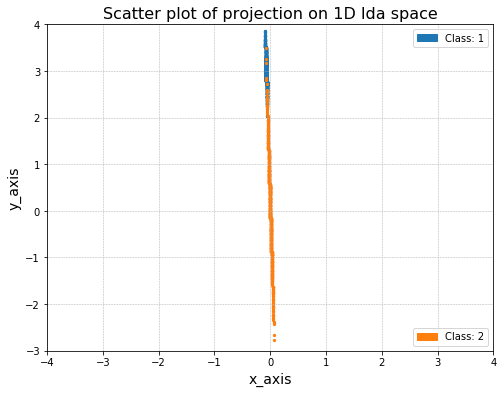

In [40]:
plt.figure(figsize=(8, 6))

for k,g in lineardf.groupby('class'):
    plt.scatter(((eig_vec[0].T)[0])*g['ld_axis'], (eig_vec[0].T)[1] * g["ld_axis"], 5)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter plot of projection on 1D lda space", size = 16)
plt.xlabel("x_axis", size = 14)
plt.ylabel("y_axis", size = 14)
plt.xlim(-4,4)
plt.ylim(-3,4)
plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()

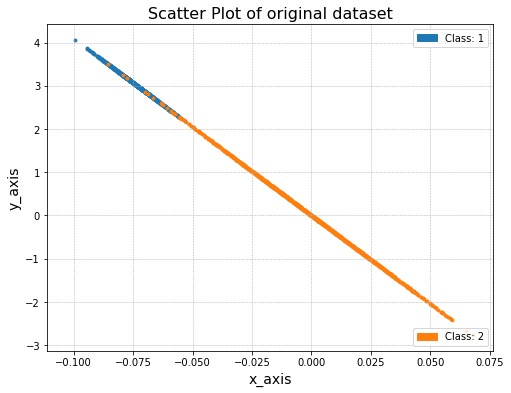

In [41]:
plt.figure(figsize=(8, 6))

for k,g in lineardf.groupby('class'):
    plt.scatter(((eig_vec[0].T)[0])*g['ld_axis'], (eig_vec[0].T)[1] * g["ld_axis"], 8)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot of original dataset", size = 16)
plt.xlabel("x_axis", size = 14)
plt.ylabel("y_axis", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()

In [9]:
df = pd.read_excel('lda_data.xlsx')
X = df.iloc[:, :2]  # Extracting Feature
y = df.iloc[:, 2] #class
#Standardizing feature
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

lda = LDA(n_components=1)
linear = lda.fit_transform(X, y)
lineardf= pd.DataFrame(projected, columns=['ld_axis'])
lineardf['class'] = y
print(lineardf)

       ld_axis  class
0    -2.797704      1
1    -3.090059      1
2    -3.426683      1
3    -2.943976      1
4    -3.113639      1
...        ...    ...
1995 -1.906615      2
1996 -0.864723      2
1997 -0.427728      2
1998  0.050091      2
1999 -0.645317      2

[2000 rows x 2 columns]


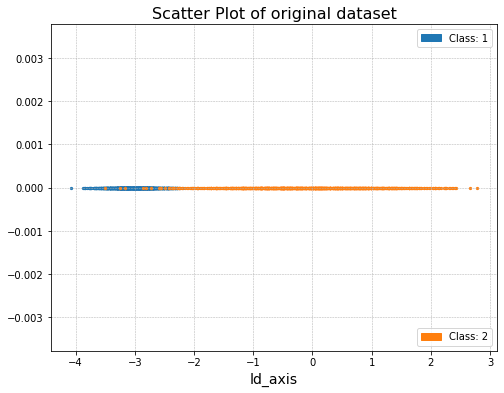

In [34]:
plt.figure(figsize=(8, 6))

for k,g in lineardf.groupby('class'):
    plt.scatter(g['ld_axis'], [0] * len(g), 5)

Class1 = mpatches.Patch(color='tab:blue', label='Class: 1')
Class2 = mpatches.Patch(color='tab:orange', label='Class: 2')
first_legend = plt.legend(handles=[Class1], loc='upper right')

plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
plt.legend(handles=[Class2], loc='lower right') # Create another legend for the second line.

plt.title("Scatter Plot of original dataset", size = 16)
plt.xlabel("ld_axis", size = 14)

plt.grid(linestyle = "--", linewidth = 0.5)
plt.show()